In [1]:
import gmsh
#!import sys

el metodo initialize 'abre' el programa.

In [2]:
gmsh.initialize()

'armamos' el modelo que queremos modificar:

In [3]:
gmsh.model.add('test2')

In [4]:
lc = 1
L = 10

Definimos las coordenadas de los puntos

In [5]:
p1 = gmsh.model.geo.addPoint(0, 0, 0, lc/5)
p2 = gmsh.model.geo.addPoint(L, 0, 0, lc) 
p3 = gmsh.model.geo.addPoint(L, L, 0, lc) 
p4 = gmsh.model.geo.addPoint(0, L, 0, lc/5) 

Luego definimos las lineas

In [6]:
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

Las curvas

In [7]:
C1 = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])

Y las superficies:

In [8]:
S1 = gmsh.model.geo.addPlaneSurface([C1])

Veamos como nos va quedando:

In [9]:
gmsh.model.geo.synchronize()

Ahora definimos algo que nos va a servir para las condiciones de contorno.

Y definimos `Grupos Físicos` para definir bordes, etc

In [10]:
Empotrado = gmsh.model.addPhysicalGroup(1, [l4])
gmsh.model.setPhysicalName(1,Empotrado,'Empotrado')

In [11]:
Traccionado = gmsh.model.addPhysicalGroup(1, [l2])
gmsh.model.setPhysicalName(1,Traccionado,'Traccionado')

In [12]:
Superficie = gmsh.model.addPhysicalGroup(2,[S1])
gmsh.model.setPhysicalName(2,Superficie, 'Superficie')

Finalemente generamos el mallado

In [13]:
gmsh.model.mesh.generate(2)

In [14]:
gmsh.fltk.run()

# El objeto mesh

In [15]:
NodeInfo = gmsh.model.mesh.get_nodes()

In [16]:
NodeInfo[1].shape

(2124,)

In [17]:
NumeroNodos = NodeInfo[0].shape[0]

In [18]:
NumeroNodos

708

In [19]:
MN = NodeInfo[1].reshape(NumeroNodos , 3)

In [20]:
MN

array([[ 0.        ,  0.        ,  0.        ],
       [10.        ,  0.        ,  0.        ],
       [10.        , 10.        ,  0.        ],
       ...,
       [ 2.81462721,  6.25087787,  0.        ],
       [ 0.27772643,  7.79573161,  0.        ],
       [ 2.57770475,  3.08616607,  0.        ]])

In [23]:
ElementInfo = gmsh.model.mesh.get_elements()

Este Objeto tiene mucha información:

In [24]:
ElementInfo

(array([ 1,  2, 15], dtype=int32),
 [array([1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387,
         1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397,    1,
            2,    3,    4,    5,    6,    7,    8,    9,   10, 1398, 1399,
         1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410,
         1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418,   11,   12,   13,
           14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
           25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
           36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,
           47,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
           58,   59,   60], dtype=uint64),
  array([  61,   62,   63, ..., 1370, 1371, 1372], dtype=uint64),
  array([1373, 1374, 1375, 1376], dtype=uint64)],
 [array([  1,   5,   5,   6,   6,   7,   7,   8,   8,   9,   9,  10,  10,
          11,  11,  12,  12,  13,  13,  14,  14,  15,  15

In [25]:
ElementInfo[0]

array([ 1,  2, 15], dtype=int32)

Las etiquetas de los triángulos

In [26]:
ElementInfo[1][1]

array([  61,   62,   63, ..., 1370, 1371, 1372], dtype=uint64)

In [27]:
ElementInfo[2][1].shape

(3936,)

In [28]:
ETYPES = ElementInfo[0]

Podemos ser un poco más precabios y tomar solo los triángulos, que son los que nos interesan para la guía 

In [29]:
ETAGS, ELEMENTS = gmsh.model.mesh.get_elements_by_type(2)

In [30]:
ETAGS

array([  61,   62,   63, ..., 1370, 1371, 1372], dtype=uint64)

In [31]:
ELEMENTS

array([362, 354, 609, ..., 359, 696, 697], dtype=uint64)

In [32]:
MC = ELEMENTS.reshape([ETAGS.shape[0],3])

In [33]:
MC.shape

(1312, 3)

In [34]:
Empotrados = gmsh.model.getEntitiesForPhysicalGroup(1,Empotrado)

In [35]:
Empotrados

array([4], dtype=int32)

In [36]:
Lineas = gmsh.model.mesh.get_elements_by_type(1)

In [37]:
Lineas

(array([1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387,
        1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397,    1,
           2,    3,    4,    5,    6,    7,    8,    9,   10, 1398, 1399,
        1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410,
        1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418,   11,   12,   13,
          14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
          25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
          36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,
          47,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
          58,   59,   60], dtype=uint64),
 array([  1,   5,   5,   6,   6,   7,   7,   8,   8,   9,   9,  10,  10,
         11,  11,  12,  12,  13,  13,  14,  14,  15,  15,  16,  16,  17,
         17,  18,  18,  19,  19,  20,  20,  21,  21,  22,  22,  23,  23,
         24,  24,   2,   2,  25,  25,  26,  26,  27,  27,  28,  28,  29,


# Condiciones de Contorno

In [38]:
NodosEmpotrados = gmsh.model.mesh.get_nodes_for_physical_group(1,Empotrado)

Con los índices de los nodos empotrados puedo aplicar las condiciones de contorno

In [39]:
NodosEmpotrados[0]

array([  1,   4,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
      dtype=uint64)

Y tambien tegno las coordenadas:

In [50]:
MNE = NodosEmpotrados[1].reshape((NodosEmpotrados[0].shape[0], 3))

In [51]:
MNE

array([[ 0. ,  0. ,  0. ],
       [ 0. , 10. ,  0. ],
       [ 0. ,  9.8,  0. ],
       [ 0. ,  9.6,  0. ],
       [ 0. ,  9.4,  0. ],
       [ 0. ,  9.2,  0. ],
       [ 0. ,  9. ,  0. ],
       [ 0. ,  8.8,  0. ],
       [ 0. ,  8.6,  0. ],
       [ 0. ,  8.4,  0. ],
       [ 0. ,  8.2,  0. ],
       [ 0. ,  8. ,  0. ],
       [ 0. ,  7.8,  0. ],
       [ 0. ,  7.6,  0. ],
       [ 0. ,  7.4,  0. ],
       [ 0. ,  7.2,  0. ],
       [ 0. ,  7. ,  0. ],
       [ 0. ,  6.8,  0. ],
       [ 0. ,  6.6,  0. ],
       [ 0. ,  6.4,  0. ],
       [ 0. ,  6.2,  0. ],
       [ 0. ,  6. ,  0. ],
       [ 0. ,  5.8,  0. ],
       [ 0. ,  5.6,  0. ],
       [ 0. ,  5.4,  0. ],
       [ 0. ,  5.2,  0. ],
       [ 0. ,  5. ,  0. ],
       [ 0. ,  4.8,  0. ],
       [ 0. ,  4.6,  0. ],
       [ 0. ,  4.4,  0. ],
       [ 0. ,  4.2,  0. ],
       [ 0. ,  4. ,  0. ],
       [ 0. ,  3.8,  0. ],
       [ 0. ,  3.6,  0. ],
       [ 0. ,  3.4,  0. ],
       [ 0. ,  3.2,  0. ],
       [ 0. ,  3. ,  0. ],
 

In [41]:
NodosTraccionados = gmsh.model.mesh.get_nodes_for_physical_group(1, Traccionado)

Con los índices de los nodos, puedo rebuscarmelas para obtener las fuerzas distribuidas:

In [42]:
NodosTraccionados[0]

array([ 2,  3, 25, 26, 27, 28, 29, 30, 31, 32, 33], dtype=uint64)

In [49]:
MNT = NodosTraccionados[1].reshape((NodosTraccionados[0].shape[0], 3))

In [52]:
MNT 

array([[10.,  0.,  0.],
       [10., 10.,  0.],
       [10.,  1.,  0.],
       [10.,  2.,  0.],
       [10.,  3.,  0.],
       [10.,  4.,  0.],
       [10.,  5.,  0.],
       [10.,  6.,  0.],
       [10.,  7.,  0.],
       [10.,  8.,  0.],
       [10.,  9.,  0.]])

In [44]:
gmsh.fltk.run()

In [45]:
gmsh.finalize()

# Nos divertimos un rato

In [21]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(10,10))

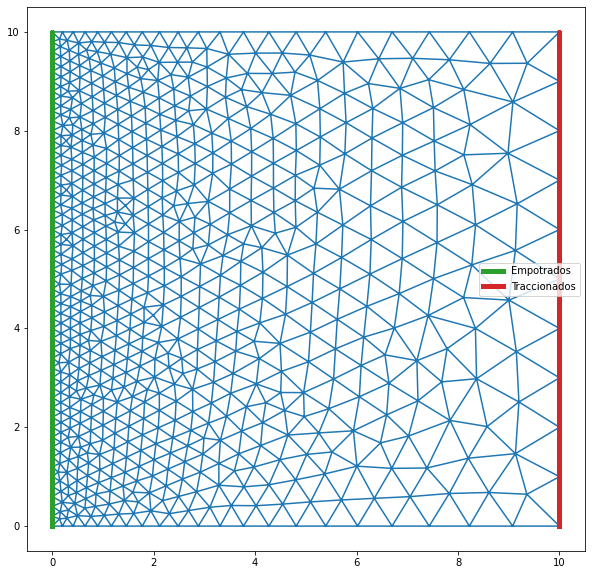

In [58]:
#plt.plot(MN[:,0],MN[:,1],'ok')
plt.triplot(MN[:,0],MN[:,1],MC-MC.min())
plt.plot(MNE[:,0], MNE[:,1], label='Empotrados', lw = 5)
plt.plot(MNT[:,0], MNT[:,1], label='Traccionados', lw = 5)
plt.legend()